Script for plotting the confution matrics of the model in a sub plot

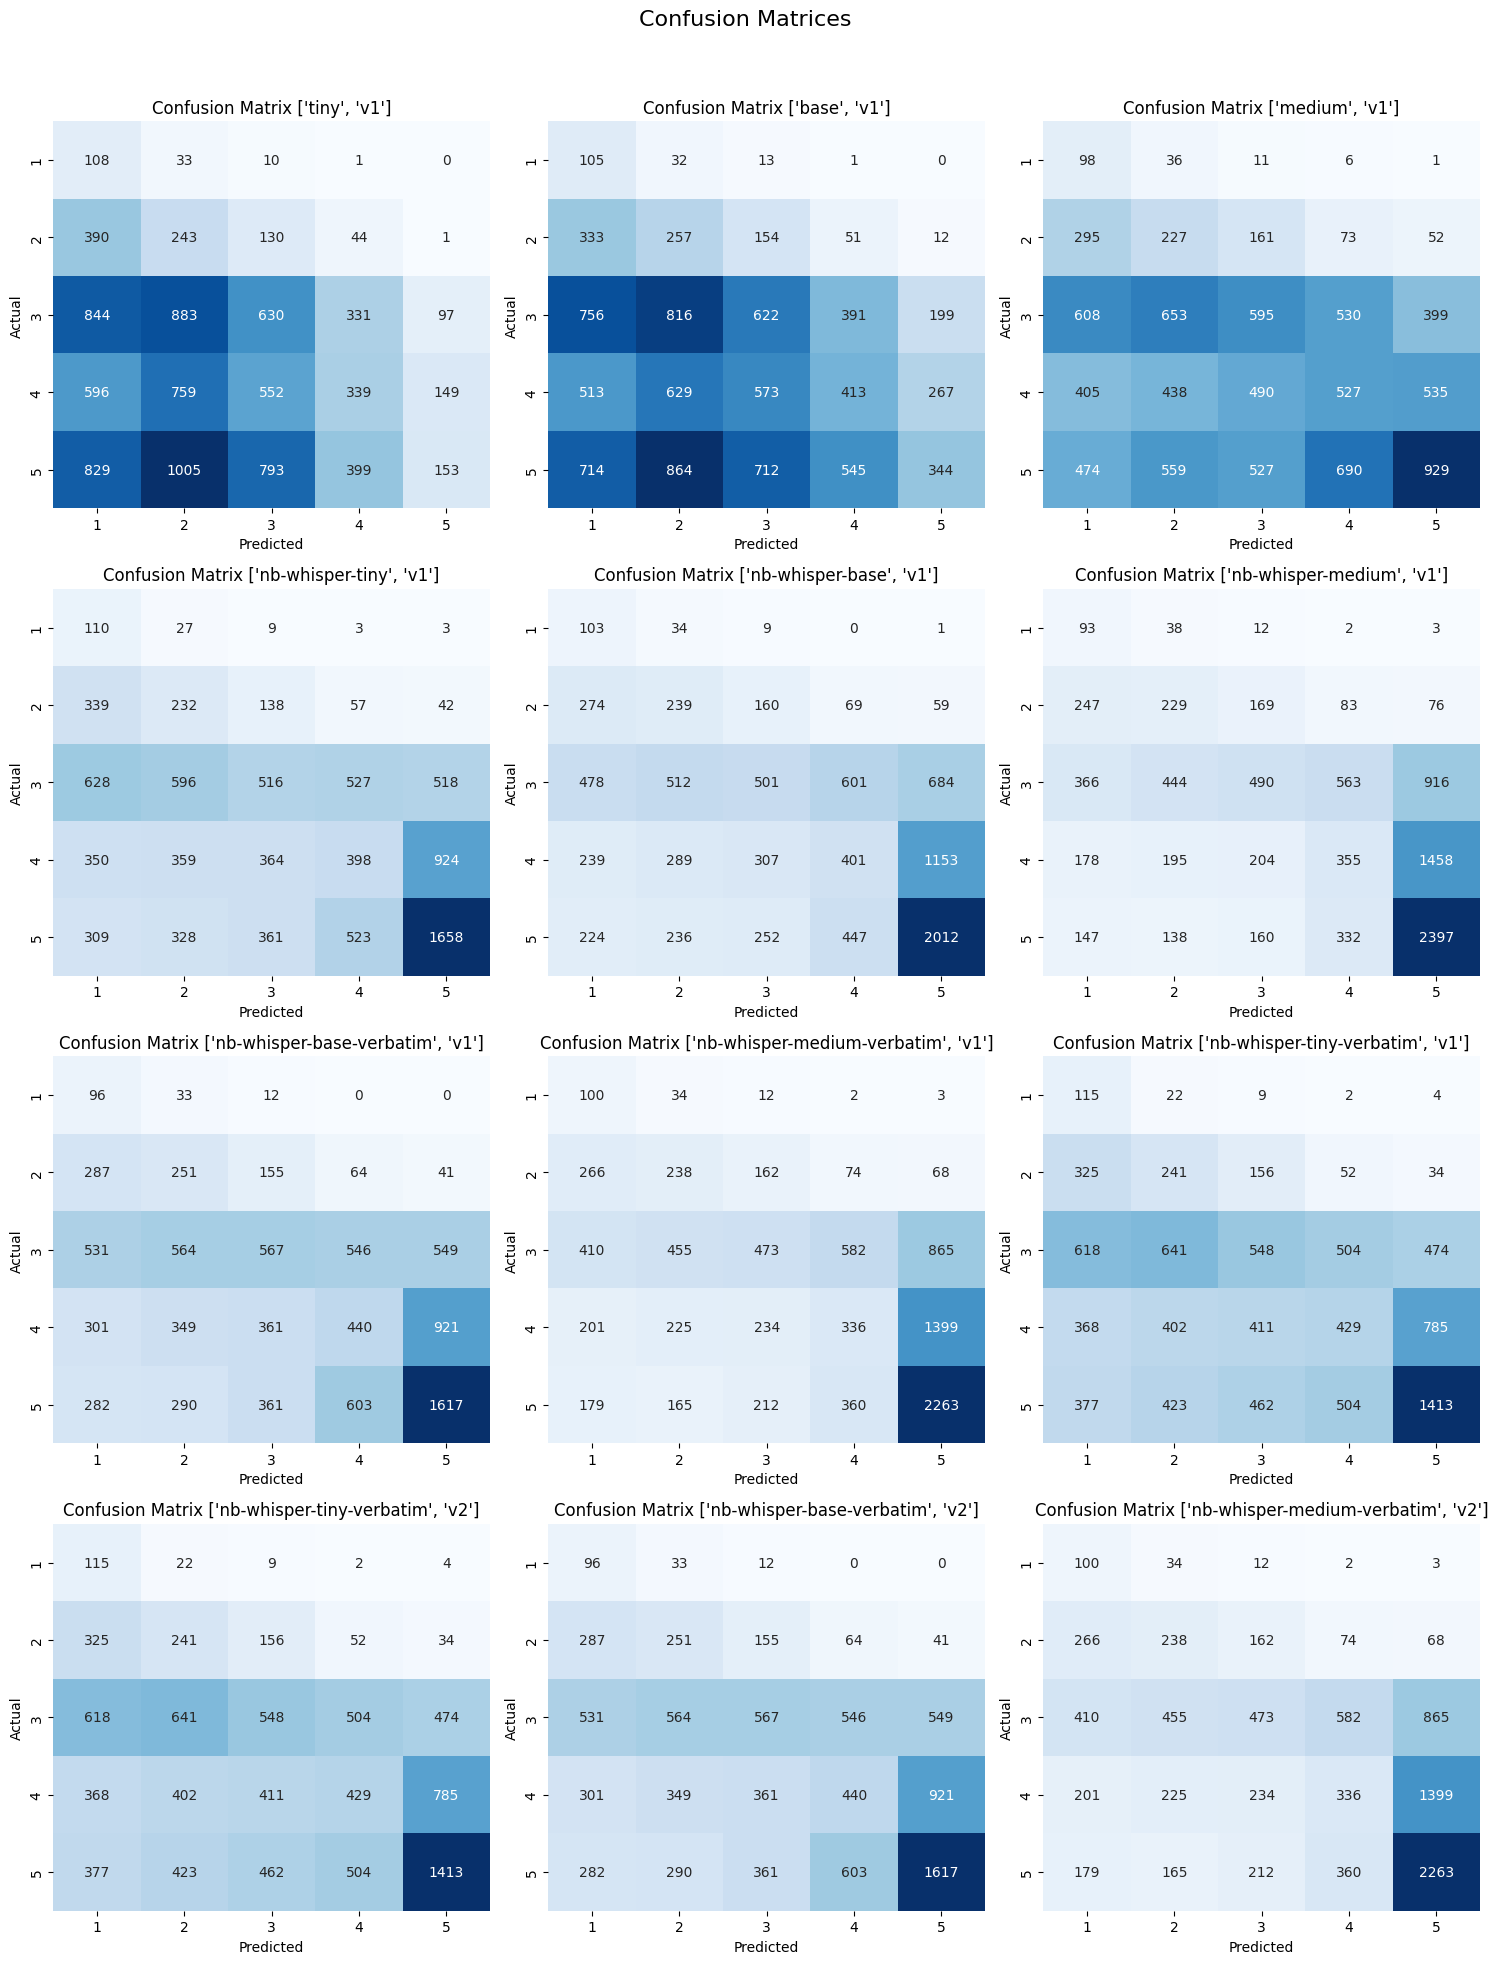

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrices(file_names, matrix_dir, plot_title='Confusion Matrices'):
    # Calculate number of rows needed for 3 columns per row
    n_files = len(file_names)
    n_rows = (n_files + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    fig.suptitle(plot_title, fontsize=16)
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    for idx, file_name in enumerate(file_names):
        # Read confusion matrix from CSV file
        path = os.path.join(matrix_dir, file_name)
        
        df = pd.read_csv(path, index_col=0)
        plot_name = file_name.split('.')[0].split('_')[2:]
        
        # Plot confusion matrix
        sns.heatmap(df, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix {plot_name}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')
    # Hide any remaining empty subplots
    for ax in axes[n_files:]:
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()
        
# get the file names    
matrix_dir = './Transcriptions/Confution_matrix'
file_list = os.listdir(matrix_dir)
plot_confusion_matrices(file_list, matrix_dir)


Classification report fro the nb medium verbatim



In [9]:
import pandas as pd
from sklearn.metrics import classification_report

# Function to generate classification reports
def generate_classification_reports(file_path, output_report='classification_report.txt'):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Extract the true labels, predicted labels, and words
    true_labels = df['OG Score'].tolist()
    pred_labels = df['CER Score'].tolist()
    words = df['Word'].tolist()
    
    # Generate overall classification report
    overall_report = classification_report(true_labels, pred_labels, labels=[1, 2, 3, 4, 5], output_dict=True)
    
    # Generate classification report for each class
    class_reports = {}
    for cls in range(1, 6):
        true_labels_class = [true == cls for true in true_labels]
        pred_labels_class = [pred == cls for pred in pred_labels]
        class_reports[cls] = classification_report(true_labels_class, pred_labels_class, labels=[True, False], output_dict=True)
    
    # Print the reports
    print("Overall Classification Report:")
    print(classification_report(true_labels, pred_labels, labels=[1, 2, 3, 4, 5]))
    
    for cls, report in class_reports.items():
        print(f"\nClassification Report for Class {cls}:")
        print(classification_report([true == cls for true in true_labels], [pred == cls for pred in pred_labels], labels=[True, False]))
    
    # Save the reports to a text file
    with open(output_report, 'w') as f:
        f.write("Overall Classification Report:\n")
        f.write(classification_report(true_labels, pred_labels, labels=[1, 2, 3, 4, 5]))
        for cls, report in class_reports.items():
            f.write(f"\nClassification Report for Class {cls}:\n")
            f.write(classification_report([true == cls for true in true_labels], [pred == cls for pred in pred_labels], labels=[True, False]))
    
    print(f"Classification reports saved to {output_report}")


file_path =  './Transcriptions/transcriptions_nb-whisper-medium-verbatim_v1.csv'
generate_classification_reports(file_path)


Overall Classification Report:
              precision    recall  f1-score   support

           1       0.09      0.66      0.15       151
           2       0.21      0.29      0.25       808
           3       0.43      0.17      0.24      2785
           4       0.25      0.14      0.18      2395
           5       0.49      0.71      0.58      3179

    accuracy                           0.37      9318
   macro avg       0.29      0.40      0.28      9318
weighted avg       0.38      0.37      0.34      9318


Classification Report for Class 1:
              precision    recall  f1-score   support

        True       0.09      0.66      0.15       151
       False       0.99      0.88      0.94      9167

    accuracy                           0.88      9318
   macro avg       0.54      0.77      0.54      9318
weighted avg       0.98      0.88      0.92      9318


Classification Report for Class 2:
              precision    recall  f1-score   support

        True       0.21   

* Precision evaluates the accuracy of the positive predictions.

* Recall evaluates the ability to find all the relevant cases.

* F1-Score is a balance between precision and recall.

* Support provides the number of true instances for each label in the dataset.

In [10]:
file_path =  './Transcriptions/transcriptions_medium_v1.csv'
generate_classification_reports(file_path)

Overall Classification Report:
              precision    recall  f1-score   support

           1       0.05      0.64      0.10       152
           2       0.12      0.28      0.17       808
           3       0.33      0.21      0.26      2785
           4       0.29      0.22      0.25      2395
           5       0.48      0.29      0.36      3179

    accuracy                           0.25      9319
   macro avg       0.26      0.33      0.23      9319
weighted avg       0.35      0.25      0.28      9319


Classification Report for Class 1:
              precision    recall  f1-score   support

        True       0.05      0.64      0.10       152
       False       0.99      0.81      0.89      9167

    accuracy                           0.80      9319
   macro avg       0.52      0.73      0.49      9319
weighted avg       0.98      0.80      0.88      9319


Classification Report for Class 2:
              precision    recall  f1-score   support

        True       0.12   